In [1]:
# import the library 
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import InputLayer, Dense 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import scikitplot as skplt
import seaborn as sn

In [2]:
 ! pip install -q scikit-plot


In [3]:
#read csv data set
data = pd.read_csv('Dataset.csv')

In [4]:
#check the dataset
data.head()

,Unnamed: 0,Waist_accX,Waist_accY,Waist_accZ,Waist_gyroX,Waist_gyroY,Waist_gyroZ,Wrist_accX,Wrist_accY,Wrist_accZ,...,Ktch_Motion_1,Ktch_B1_Draw,Ktch_T2_Cupboard,Ktch_Motion_2,Ktch_T1_Cupboard,Ktch_B2_Cupboard,Ktch_B3_Cupboard,Ktch_T3_Cupboard,TP_L_Power,Target_class
0,0,1.020,-0.144,-0.0392,-41.6,12.6,-11.500,-0.725,0.237,-0.649,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,cereals
1,1,0.931,-0.046,0.0547,-13.3,45.4,-5.730,-0.671,0.231,-0.748,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,cereals
2,2,0.877,-0.107,-0.1520,-42.0,20.7,-0.854,-0.780,0.197,-0.713,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,cereals
3,3,0.877,-0.107,-0.1520,-42.0,20.7,-0.854,-0.818,0.169,-0.727,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,cereals
4,4,1.090,0.040,0.0464,-16.6,-19.3,4.270,-0.798,0.172,-0.695,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,cereals


In [5]:
data

,Unnamed: 0,Waist_accX,Waist_accY,Waist_accZ,Waist_gyroX,Waist_gyroY,Waist_gyroZ,Wrist_accX,Wrist_accY,Wrist_accZ,...,Ktch_Motion_1,Ktch_B1_Draw,Ktch_T2_Cupboard,Ktch_Motion_2,Ktch_T1_Cupboard,Ktch_B2_Cupboard,Ktch_B3_Cupboard,Ktch_T3_Cupboard,TP_L_Power,Target_class
0,0,1.020,-0.1440,-0.0392,-41.6,12.60,-11.500,-0.725,0.237,-0.649,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,cereals
1,1,0.931,-0.0460,0.0547,-13.3,45.40,-5.730,-0.671,0.231,-0.748,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,cereals
2,2,0.877,-0.1070,-0.1520,-42.0,20.70,-0.854,-0.780,0.197,-0.713,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,cereals
3,3,0.877,-0.1070,-0.1520,-42.0,20.70,-0.854,-0.818,0.169,-0.727,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,cereals
4,4,1.090,0.0400,0.0464,-16.6,-19.30,4.270,-0.798,0.172,-0.695,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,cereals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17078,17078,0.961,0.0573,-0.0876,-24.6,0.61,7.990,-1.530,-0.198,-0.187,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,tidy
17079,17079,0.977,0.0857,-0.0814,-22.4,-3.78,6.650,-1.530,-0.198,-0.187,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,tidy
17080,17080,0.967,0.0850,-0.0775,-24.5,-4.70,5.610,-1.400,-0.173,-0.146,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,tidy
17081,17081,0.932,0.0829,-0.0632,-29.5,-7.20,3.840,-1.050,-0.479,-0.124,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,tidy


In [6]:
#data types present in the dataset
data.dtypes

Unnamed: 0            int64
Waist_accX          float64
Waist_accY          float64
Waist_accZ          float64
Waist_gyroX         float64
Waist_gyroY         float64
Waist_gyroZ         float64
Wrist_accX          float64
Wrist_accY          float64
Wrist_accZ          float64
Wrist_gyroX         float64
Wrist_gyroY         float64
Wrist_gyroZ         float64
Ktch_T4_Cupboard    float64
Ktch_B4_Cupboard    float64
Ktch_Motion_1       float64
Ktch_B1_Draw        float64
Ktch_T2_Cupboard    float64
Ktch_Motion_2       float64
Ktch_T1_Cupboard    float64
Ktch_B2_Cupboard    float64
Ktch_B3_Cupboard    float64
Ktch_T3_Cupboard    float64
TP_L_Power          float64
Target_class         object
dtype: object

In [7]:
#check missing values by summing up null values in the dataset
data.isna().sum()

Unnamed: 0          0
Waist_accX          0
Waist_accY          0
Waist_accZ          0
Waist_gyroX         0
Waist_gyroY         0
Waist_gyroZ         0
Wrist_accX          0
Wrist_accY          0
Wrist_accZ          0
Wrist_gyroX         0
Wrist_gyroY         0
Wrist_gyroZ         0
Ktch_T4_Cupboard    0
Ktch_B4_Cupboard    0
Ktch_Motion_1       0
Ktch_B1_Draw        0
Ktch_T2_Cupboard    0
Ktch_Motion_2       0
Ktch_T1_Cupboard    0
Ktch_B2_Cupboard    0
Ktch_B3_Cupboard    0
Ktch_T3_Cupboard    0
TP_L_Power          0
Target_class        0
dtype: int64

In [8]:
del data['Unnamed: 0']

In [9]:
#label encoding
from sklearn.preprocessing import LabelEncoder
labelencoder_target = LabelEncoder()
data.loc[:,"Target_class"]=labelencoder_target.fit_transform(data.loc[:,"Target_class"])

In [10]:
#storing target class in Y
Y = data['Target_class']

In [11]:
#dropping the target class from the dataframe, because normalization is applied over DF
data = data.drop('Target_class', axis=1)

In [12]:
data

,Waist_accX,Waist_accY,Waist_accZ,Waist_gyroX,Waist_gyroY,Waist_gyroZ,Wrist_accX,Wrist_accY,Wrist_accZ,Wrist_gyroX,...,Ktch_B4_Cupboard,Ktch_Motion_1,Ktch_B1_Draw,Ktch_T2_Cupboard,Ktch_Motion_2,Ktch_T1_Cupboard,Ktch_B2_Cupboard,Ktch_B3_Cupboard,Ktch_T3_Cupboard,TP_L_Power
0,1.020,-0.1440,-0.0392,-41.6,12.60,-11.500,-0.725,0.237,-0.649,2.320,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
1,0.931,-0.0460,0.0547,-13.3,45.40,-5.730,-0.671,0.231,-0.748,-0.122,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
2,0.877,-0.1070,-0.1520,-42.0,20.70,-0.854,-0.780,0.197,-0.713,-5.300,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
3,0.877,-0.1070,-0.1520,-42.0,20.70,-0.854,-0.818,0.169,-0.727,-6.650,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
4,1.090,0.0400,0.0464,-16.6,-19.30,4.270,-0.798,0.172,-0.695,-6.710,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17078,0.961,0.0573,-0.0876,-24.6,0.61,7.990,-1.530,-0.198,-0.187,178.000,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
17079,0.977,0.0857,-0.0814,-22.4,-3.78,6.650,-1.530,-0.198,-0.187,178.000,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
17080,0.967,0.0850,-0.0775,-24.5,-4.70,5.610,-1.400,-0.173,-0.146,155.000,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
17081,0.932,0.0829,-0.0632,-29.5,-7.20,3.840,-1.050,-0.479,-0.124,38.000,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0


In [13]:
# normalization of data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)

In [14]:
#scaled array to data frame
Df = pd.DataFrame(scaled, index=data.index, columns=data.columns)

In [15]:
Df

,Waist_accX,Waist_accY,Waist_accZ,Waist_gyroX,Waist_gyroY,Waist_gyroZ,Wrist_accX,Wrist_accY,Wrist_accZ,Wrist_gyroX,...,Ktch_B4_Cupboard,Ktch_Motion_1,Ktch_B1_Draw,Ktch_T2_Cupboard,Ktch_Motion_2,Ktch_T1_Cupboard,Ktch_B2_Cupboard,Ktch_B3_Cupboard,Ktch_T3_Cupboard,TP_L_Power
0,0.547135,0.486649,0.546081,0.487247,0.436850,0.413738,0.395963,0.665774,0.159048,0.546579,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1,0.506007,0.513351,0.580476,0.497108,0.482982,0.432173,0.412733,0.663988,0.127619,0.542562,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2,0.481054,0.496730,0.504762,0.487108,0.448242,0.447751,0.378882,0.653869,0.138730,0.534046,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
3,0.481054,0.496730,0.504762,0.487108,0.448242,0.447751,0.367081,0.645536,0.134286,0.531826,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,0.579482,0.536785,0.577436,0.495958,0.391983,0.464121,0.373292,0.646429,0.144444,0.531727,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17078,0.519871,0.541499,0.528352,0.493171,0.419986,0.476006,0.145963,0.536310,0.305714,0.835526,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
17079,0.527264,0.549237,0.530623,0.493937,0.413812,0.471725,0.145963,0.536310,0.305714,0.835526,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
17080,0.522643,0.549046,0.532051,0.493206,0.412518,0.468403,0.186335,0.543750,0.318730,0.797697,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
17081,0.506470,0.548474,0.537289,0.491463,0.409001,0.462748,0.295031,0.452679,0.325714,0.605263,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


In [16]:
Df.isnull().sum()

Waist_accX          0
Waist_accY          0
Waist_accZ          0
Waist_gyroX         0
Waist_gyroY         0
Waist_gyroZ         0
Wrist_accX          0
Wrist_accY          0
Wrist_accZ          0
Wrist_gyroX         0
Wrist_gyroY         0
Wrist_gyroZ         0
Ktch_T4_Cupboard    0
Ktch_B4_Cupboard    0
Ktch_Motion_1       0
Ktch_B1_Draw        0
Ktch_T2_Cupboard    0
Ktch_Motion_2       0
Ktch_T1_Cupboard    0
Ktch_B2_Cupboard    0
Ktch_B3_Cupboard    0
Ktch_T3_Cupboard    0
TP_L_Power          0
dtype: int64

In [17]:
X_inertia = Df.iloc[:,:12]

In [18]:
X_inertia.head()

,Waist_accX,Waist_accY,Waist_accZ,Waist_gyroX,Waist_gyroY,Waist_gyroZ,Wrist_accX,Wrist_accY,Wrist_accZ,Wrist_gyroX,Wrist_gyroY,Wrist_gyroZ
0,0.547135,0.486649,0.546081,0.487247,0.436850,0.413738,0.395963,0.665774,0.159048,0.546579,0.546433,0.458364
1,0.506007,0.513351,0.580476,0.497108,0.482982,0.432173,0.412733,0.663988,0.127619,0.542562,0.551722,0.454498
2,0.481054,0.496730,0.504762,0.487108,0.448242,0.447751,0.378882,0.653869,0.138730,0.534046,0.542374,0.447249
3,0.481054,0.496730,0.504762,0.487108,0.448242,0.447751,0.367081,0.645536,0.134286,0.531826,0.540467,0.446227
4,0.579482,0.536785,0.577436,0.495958,0.391983,0.464121,0.373292,0.646429,0.144444,0.531727,0.539237,0.454851


In [19]:
X_inertia.isnull().sum()

Waist_accX     0
Waist_accY     0
Waist_accZ     0
Waist_gyroX    0
Waist_gyroY    0
Waist_gyroZ    0
Wrist_accX     0
Wrist_accY     0
Wrist_accZ     0
Wrist_gyroX    0
Wrist_gyroY    0
Wrist_gyroZ    0
dtype: int64

In [20]:
X_ambient = Df.iloc[:,12:]

In [21]:
X_ambient.head()

,Ktch_T4_Cupboard,Ktch_B4_Cupboard,Ktch_Motion_1,Ktch_B1_Draw,Ktch_T2_Cupboard,Ktch_Motion_2,Ktch_T1_Cupboard,Ktch_B2_Cupboard,Ktch_B3_Cupboard,Ktch_T3_Cupboard,TP_L_Power
0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


X_ambient.isnull().sum()

In [22]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
17078    8
17079    8
17080    8
17081    8
17082    8
Name: Target_class, Length: 17083, dtype: int32

In [23]:
X_inertia.shape, Y.shape, X_ambient.shape

((17083, 12), (17083,), (17083, 11))

In [24]:
X_inertia_train,X_inertia_test,Y_train,Y_test = train_test_split(X_inertia,Y,stratify=Y,random_state=10,test_size=0.2)

In [25]:
print(X_inertia_train.shape, X_inertia_test.shape,Y_train.shape,Y_test.shape)

(13666, 12) (3417, 12) (13666,) (3417,)


In [26]:
#one hot encoding on labels(to convert categorical) 
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train, 9)
Y_test = to_categorical(Y_test, 9)

In [27]:
X_inertia_train.shape, X_inertia_test.shape,Y_train.shape,Y_test.shape

((13666, 12), (3417, 12), (13666, 9), (3417, 9))

In [28]:
X_inertia_train

,Waist_accX,Waist_accY,Waist_accZ,Waist_gyroX,Waist_gyroY,Waist_gyroZ,Wrist_accX,Wrist_accY,Wrist_accZ,Wrist_gyroX,Wrist_gyroY,Wrist_gyroZ
3785,0.528651,0.583924,0.553150,0.518711,0.431561,0.456134,0.279503,0.558333,0.453016,0.563980,0.454674,0.430669
344,0.560998,0.517248,0.559194,0.485645,0.469339,0.455751,0.510559,0.298214,0.475556,0.520559,0.494157,0.263941
7356,0.510166,0.531417,0.498535,0.521986,0.411927,0.381470,0.449689,0.273810,0.444444,0.559211,0.554797,0.424535
4446,0.480129,0.521117,0.567363,0.542160,0.330942,0.785942,0.486646,0.409226,0.438095,0.463816,0.509533,0.451450
15271,0.519871,0.566485,0.553590,0.504951,0.418013,0.453994,0.341615,0.646131,0.557143,0.474836,0.475215,0.486617
...,...,...,...,...,...,...,...,...,...,...,...,...
984,0.508780,0.523324,0.540586,0.490592,0.408664,0.455144,0.428261,0.302381,0.440635,0.563816,0.478352,0.556877
2599,0.493993,0.605722,0.528132,0.479024,0.405921,0.511182,0.447205,0.410417,0.567937,0.553289,0.505055,0.468680
1087,0.506932,0.609537,0.543443,0.504885,0.440647,0.445623,0.598385,0.599286,0.650794,0.591283,0.461624,0.601673
15646,0.519409,0.544850,0.517949,0.501105,0.415007,0.446581,0.364907,0.514881,0.531429,0.547171,0.502583,0.439777


In [29]:
X_inertia_train.shape[1]

12

In [30]:
#input_neurons = X_inertia_train.shape[1]

In [31]:
output_neurons = 9

In [32]:
number_of_hidden_layers = 4
neuron_hidden_layer_1 = 64
neuron_hidden_layer_2 = 64
neuron_hidden_layer_3 = 64
neuron_hidden_layer_4 = 64

In [33]:
model1 = Sequential()
#model.add(InputLayer(input_shape=(input_neurons,)))

model1.add(Dense(units=neuron_hidden_layer_1, activation='relu', input_shape = (13666, 12)))
model1.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model1.add(Dense(units=neuron_hidden_layer_3, activation='relu'))
model1.add(Dense(units=neuron_hidden_layer_4, activation='relu'))
model1.add(Dense(units=output_neurons, activation='softmax'))

In [34]:
model1.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [35]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13666, 64)         832       
_________________________________________________________________
dense_1 (Dense)              (None, 13666, 64)         4160      
_________________________________________________________________
dense_2 (Dense)              (None, 13666, 64)         4160      
_________________________________________________________________
dense_3 (Dense)              (None, 13666, 64)         4160      
_________________________________________________________________
dense_4 (Dense)              (None, 13666, 9)          585       
Total params: 13,897
Trainable params: 13,897
Non-trainable params: 0
_________________________________________________________________


In [36]:
model1_history = model1.fit(X_inertia_train, Y_train, validation_data=(X_inertia_test, Y_test), epochs=50)

Epoch 1/50
428/428 [==============================] - 3s 4ms/step - loss: 1.6370 - accuracy: 0.3523 - val_loss: 1.4258 - val_accuracy: 0.4214
Epoch 2/50
428/428 [==============================] - 1s 3ms/step - loss: 1.3467 - accuracy: 0.4666 - val_loss: 1.2821 - val_accuracy: 0.4928
Epoch 3/50
428/428 [==============================] - 1s 3ms/step - loss: 1.2698 - accuracy: 0.4944 - val_loss: 1.2315 - val_accuracy: 0.5086
Epoch 4/50
428/428 [==============================] - 1s 3ms/step - loss: 1.2270 - accuracy: 0.5246 - val_loss: 1.2038 - val_accuracy: 0.5420
Epoch 5/50
428/428 [==============================] - 1s 3ms/step - loss: 1.1979 - accuracy: 0.5374 - val_loss: 1.2022 - val_accuracy: 0.5121
Epoch 6/50
428/428 [==============================] - 1s 3ms/step - loss: 1.1585 - accuracy: 0.5541 - val_loss: 1.1271 - val_accuracy: 0.5593
Epoch 7/50
428/428 [==============================] - 1s 3ms/step - loss: 1.1330 - accuracy: 0.5675 - val_loss: 1.1140 - val_accuracy: 0.5666
Epoch 

In [37]:
M1_train_acc = model1.evaluate(X_inertia_train, Y_train, verbose=1)

428/428 [==============================] - 1s 2ms/step - loss: 0.5475 - accuracy: 0.8060


In [38]:
M1_train_acc = model1.evaluate(X_inertia_train, Y_train, verbose=1)

428/428 [==============================] - 1s 1ms/step - loss: 0.5475 - accuracy: 0.8060


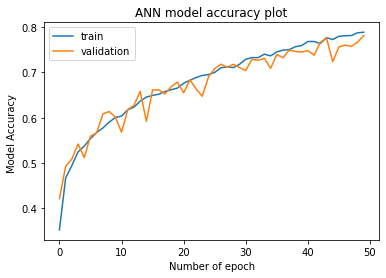

In [39]:
# plotting the graph
import matplotlib.pyplot as plt
plt.plot(model1_history.history['accuracy'])
plt.plot(model1_history.history['val_accuracy'])
plt.title('ANN model accuracy plot')
plt.ylabel('Model Accuracy ')
plt.xlabel('Number of epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

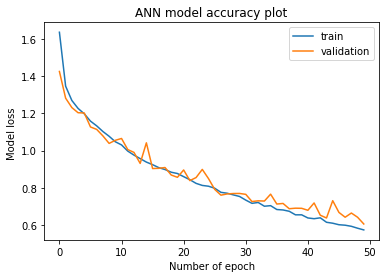

In [40]:
plt.plot(model1_history.history['loss'])
plt.plot(model1_history.history['val_loss'])
plt.title('ANN model accuracy plot')
plt.ylabel('Model loss ')
plt.xlabel('Number of epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

# Ambient_sensor 


In [41]:
X_ambient_train,X_ambient_test = train_test_split(X_ambient,stratify=Y,random_state=10,test_size=0.2)

In [42]:
X_ambient_train.shape,X_ambient_test.shape,Y_train.shape,Y_test.shape

((13666, 11), (3417, 11), (13666, 9), (3417, 9))

In [43]:
X_ambient_train.head()

,Ktch_T4_Cupboard,Ktch_B4_Cupboard,Ktch_Motion_1,Ktch_B1_Draw,Ktch_T2_Cupboard,Ktch_Motion_2,Ktch_T1_Cupboard,Ktch_B2_Cupboard,Ktch_B3_Cupboard,Ktch_T3_Cupboard,TP_L_Power
3785,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
344,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
7356,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4446,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
15271,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0


In [44]:
X_ambient_train.shape[1]

11

In [45]:
Output_neurons = 9

In [46]:
number_of_hidden_layers = 4
neuron_hidden_layer_1 = 64
neuron_hidden_layer_2 = 64
neuron_hidden_layer_3 = 64
neuron_hidden_layer_4 = 64

In [47]:
model2 = Sequential()
#model.add(InputLayer(input_shape=(input_neurons,)))

model2.add(Dense(units=neuron_hidden_layer_1, activation='relu', input_shape = (13666, 11)))
model2.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model2.add(Dense(units=neuron_hidden_layer_3, activation='relu'))
model2.add(Dense(units=neuron_hidden_layer_4, activation='relu'))
model2.add(Dense(units=output_neurons, activation='softmax'))

In [48]:
model2.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [49]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 13666, 64)         768       
_________________________________________________________________
dense_6 (Dense)              (None, 13666, 64)         4160      
_________________________________________________________________
dense_7 (Dense)              (None, 13666, 64)         4160      
_________________________________________________________________
dense_8 (Dense)              (None, 13666, 64)         4160      
_________________________________________________________________
dense_9 (Dense)              (None, 13666, 9)          585       
Total params: 13,833
Trainable params: 13,833
Non-trainable params: 0
_________________________________________________________________


In [50]:
model2_history = model2.fit(X_ambient_train, Y_train, validation_data=(X_ambient_test, Y_test), epochs=50)

Epoch 1/50
428/428 [==============================] - 1s 2ms/step - loss: 1.4798 - accuracy: 0.4138 - val_loss: 1.2981 - val_accuracy: 0.4375
Epoch 2/50
428/428 [==============================] - 1s 1ms/step - loss: 1.2753 - accuracy: 0.4753 - val_loss: 1.2568 - val_accuracy: 0.4808
Epoch 3/50
428/428 [==============================] - 1s 2ms/step - loss: 1.2546 - accuracy: 0.4789 - val_loss: 1.2474 - val_accuracy: 0.4858
Epoch 4/50
428/428 [==============================] - 1s 2ms/step - loss: 1.2473 - accuracy: 0.4807 - val_loss: 1.2401 - val_accuracy: 0.4858
Epoch 5/50
428/428 [==============================] - 1s 3ms/step - loss: 1.2426 - accuracy: 0.4849 - val_loss: 1.2414 - val_accuracy: 0.4858
Epoch 6/50
428/428 [==============================] - 1s 2ms/step - loss: 1.2408 - accuracy: 0.4843 - val_loss: 1.2392 - val_accuracy: 0.4858
Epoch 7/50
428/428 [==============================] - 1s 3ms/step - loss: 1.2399 - accuracy: 0.4834 - val_loss: 1.2329 - val_accuracy: 0.4858
Epoch 

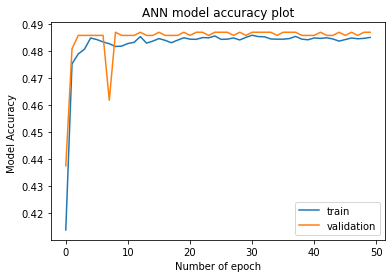

In [51]:
# plotting the graph
import matplotlib.pyplot as plt
plt.plot(model2_history.history['accuracy'])
plt.plot(model2_history.history['val_accuracy'])
plt.title('ANN model accuracy plot')
plt.ylabel('Model Accuracy ')
plt.xlabel('Number of epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

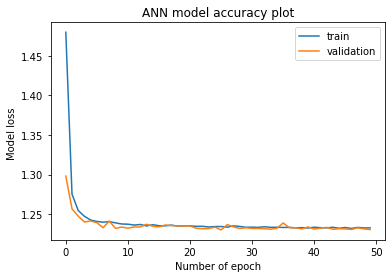

In [52]:
plt.plot(model2_history.history['loss'])
plt.plot(model2_history.history['val_loss'])
plt.title('ANN model accuracy plot')
plt.ylabel('Model loss ')
plt.xlabel('Number of epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

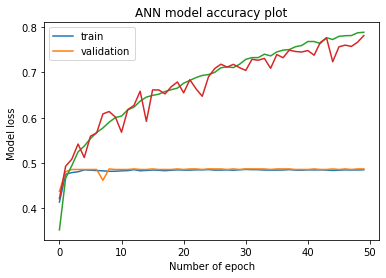

In [53]:
plt.plot(model2_history.history['accuracy'])
plt.plot(model2_history.history['val_accuracy'])
plt.plot(model1_history.history['accuracy'])
plt.plot(model1_history.history['val_accuracy'])
plt.title('ANN model accuracy plot')
plt.ylabel('Model loss ')
plt.xlabel('Number of epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

# Inertia sensor results

In [54]:
y_pred = model1.predict(X_inertia_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(Y_test, axis =1)

In [55]:
cm_model1 = confusion_matrix(y_test, y_pred)
print(cm)

NameError: name 'cm' is not defined

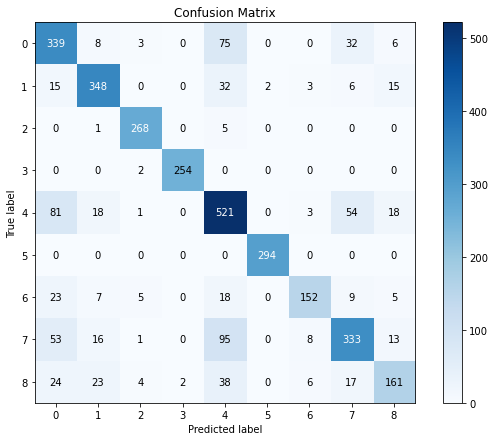

In [56]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, figsize=(10,7))

In [57]:
Recall = recall_score(y_pred, y_test, average='weighted')
precision = precision_score(y_pred, y_test, average='weighted')
F1score = f1_score(y_pred, y_test, average='weighted')
print("Recall score = ", Recall)
print("precision score = ", precision)
print("F1 score = ", F1score)

Recall score =  0.781387181738367
precision score =  0.7874596652884409
F1 score =  0.7816812220238252


In [58]:
M1_train_acc = model1.evaluate(X_inertia_train, Y_train, verbose=1)

428/428 [==============================] - 1s 1ms/step - loss: 0.5475 - accuracy: 0.8060


In [59]:
M2_test_acc = model1.evaluate(X_inertia_test, Y_test, verbose=1)

107/107 [==============================] - 0s 1ms/step - loss: 0.6048 - accuracy: 0.7814


# Ambient results

In [60]:
y_pred2 = model2.predict(X_ambient_test)
y_pred2 = np.argmax(y_pred2, axis=1)
y_test = np.argmax(Y_test, axis =1)

In [61]:
cm_model2 = confusion_matrix(y_test, y_pred2)
print(cm_model2)

[[ 55  66   0   0 335   0   0   0   7]
 [  0 296   0   0 125   0   0   0   0]
 [  0   0 274   0   0   0   0   0   0]
 [  0  89   0   0 167   0   0   0   0]
 [ 10  34   8   0 611   0   0   0  33]
 [  0   0 188   0   0   0   0   0 106]
 [  0   0   0   0 212   0   0   0   7]
 [  0 112   0   0 254   0   0 153   0]
 [  0   0   0   0   0   0   0   0 275]]


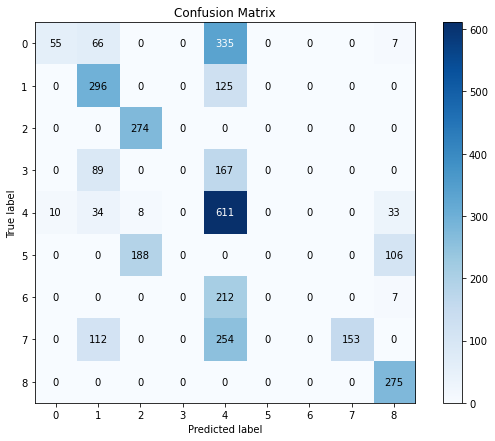

In [62]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred2, figsize=(10,7))


In [67]:
Recall2 = recall_score(y_pred2, y_test, average='weighted')
precision2 = precision_score(y_pred2, y_test, average='weighted')
F1score2 = f1_score(y_pred2, y_test, average='weighted')
print("Recall score = ", Recall2)
print("precision score = ", precision2)
print("F1 score = ", F1score2)

Recall score =  0.48697688030436054
precision score =  0.8388836547233892
F1 score =  0.5791745970116452


C:\Users\BHAVANA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
M1_train_acc = model2.evaluate(X_ambient_train, Y_train, verbose=1)

428/428 [==============================] - 1s 2ms/step - loss: 1.2305 - accuracy: 0.4851


In [65]:
M2_test_acc = model2.evaluate(X_ambient_test, Y_test, verbose=1)

107/107 [==============================] - 0s 977us/step - loss: 1.2305 - accuracy: 0.4870


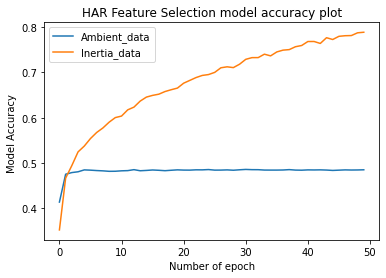

In [66]:
import matplotlib.pyplot as plt
plt.plot(model2_history.history['accuracy'])
plt.plot(model1_history.history['accuracy'])
plt.title('HAR Feature Selection model accuracy plot')
plt.ylabel('Model Accuracy ')
plt.xlabel('Number of epoch')
plt.legend(['Ambient_data', 'Inertia_data'], loc='best')
plt.show()


